<a href="https://colab.research.google.com/github/SaiDhanyaa/ExcelR_Assignments/blob/main/ASSIGNMENT_11_DECISION_TREE_FRAUD_CHECK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [17]:
# import some data to play with
data = pd.read_csv('/content/Fraud_check.csv')

In [18]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [19]:
# ## Preprocessing

In [21]:
data.loc[data["Taxable.Income"] <= 30000,"Taxable_Income"]="Risky"
data.loc[data["Taxable.Income"] > 30001,"Taxable_Income"]="Good"

In [23]:
# ### Label Encoding

In [24]:
#Complete company dataset
label_encoder = preprocessing.LabelEncoder()
data['Undergrad']= label_encoder.fit_transform(data['Undergrad']) 
data['Marital.Status']= label_encoder.fit_transform(data['Marital.Status']) 
data['Urban']= label_encoder.fit_transform(data['Urban']) 
data['Taxable_Income']= label_encoder.fit_transform(data['Taxable_Income']) 

In [25]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_Income
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [34]:
data.drop(['City.Population'],axis=1,inplace=True)

In [ ]:
data

In [37]:
x=data.iloc[:,0:4]
y=data['Taxable_Income']

In [38]:
x

,Undergrad,Marital.Status,Taxable.Income,Work.Experience
0,0,2,68833,10
1,1,0,33700,18
2,0,1,36925,30
3,1,2,50190,15
4,0,1,81002,28
...,...,...,...,...
595,1,0,76340,7
596,1,0,69967,2
597,0,0,47334,0
598,1,1,98592,17


In [39]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable_Income, Length: 600, dtype: int64

In [40]:
colnames = list(data.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'Work.Experience',
 'Urban',
 'Taxable_Income']

In [41]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40) 

In [31]:
### Building Decision Tree Classifier using Entropy Criteria

In [42]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

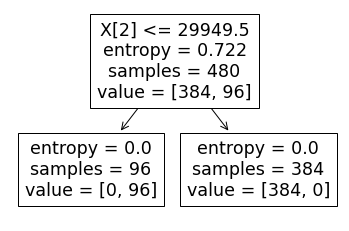

In [43]:
#PLot the decision tree
tree.plot_tree(model);

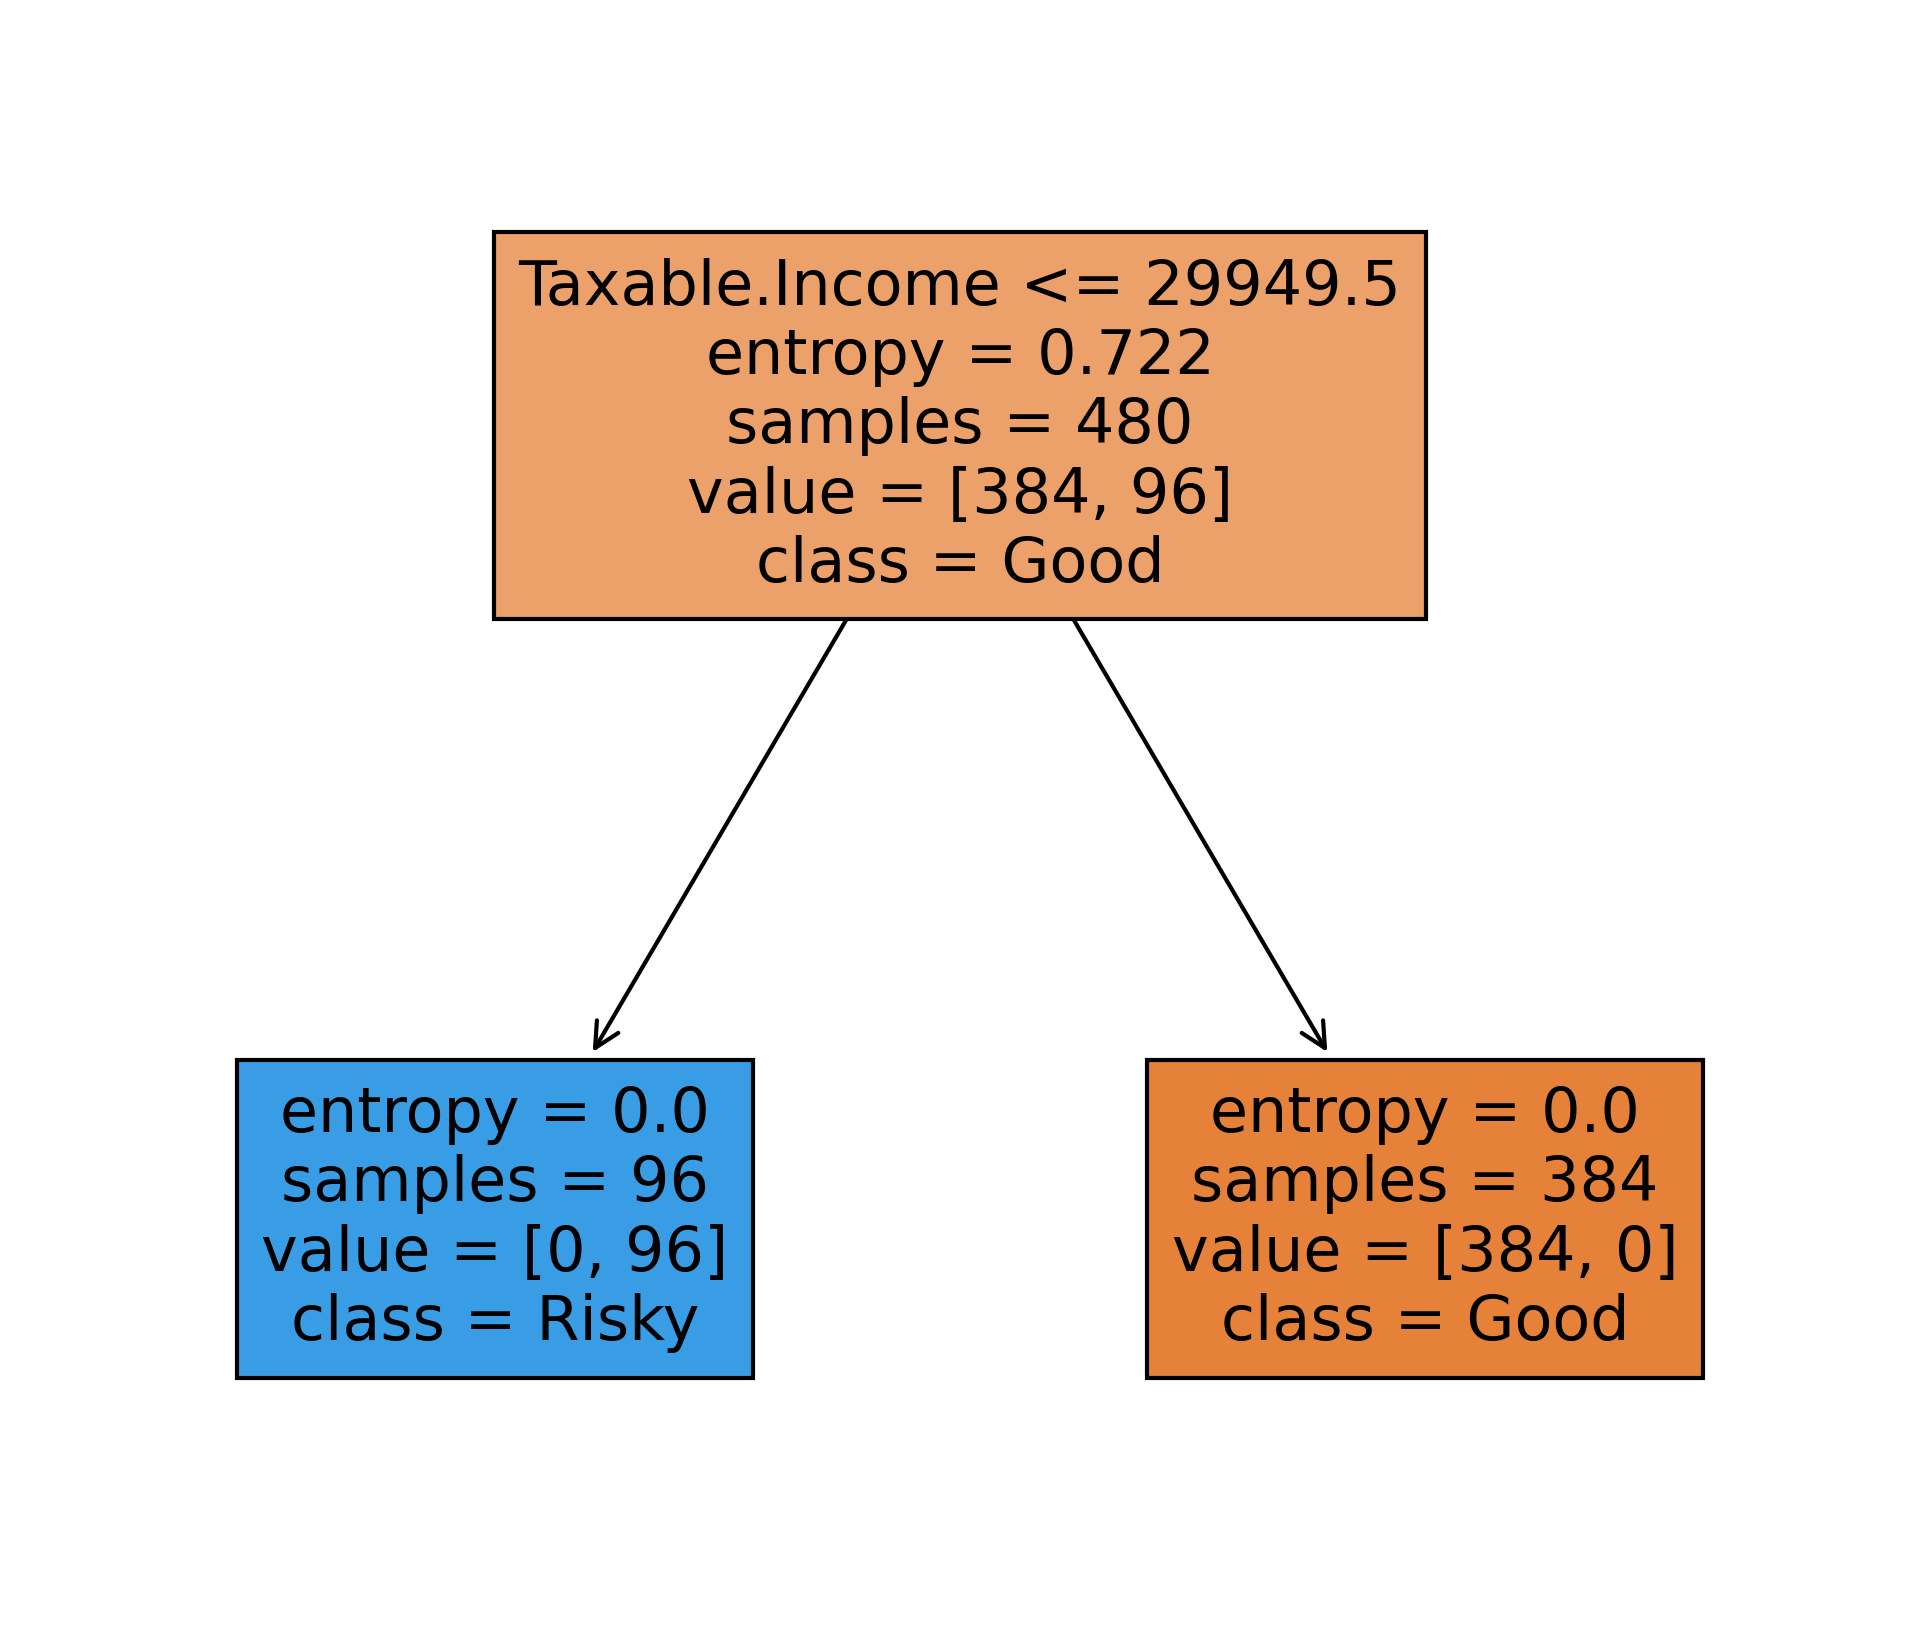

In [44]:
fn=[ 'Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'Work.Experience',
   'Urban']
cn=['Good','Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,7), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [45]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    92
1    28
dtype: int64

In [46]:
preds

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [47]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Taxable_Income,,
0,92,0
1,0,28


In [48]:
# Accuracy 
np.mean(preds==y_test)

1.0

In [49]:
### Building Decision Tree Classifier (CART) using Gini Criteria

In [50]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [51]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [52]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

1.0

In [53]:
#### Decision Tree Regression Example

In [54]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [55]:
array = data.values

X=array[:,0:4]
X


array([[    0,     2, 68833,    10],
       [    1,     0, 33700,    18],
       [    0,     1, 36925,    30],
       ...,
       [    0,     0, 47334,     0],
       [    1,     1, 98592,    17],
       [    0,     0, 96519,    16]])

In [ ]:
Y=array[:,4]
Y

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=40)

In [60]:
from sklearn.tree import DecisionTreeRegressor
model1=DecisionTreeRegressor()
model1.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [61]:
#Find the accuracy
model1.score(X_test,Y_test)

-0.98

In [ ]:
#The Regressor method is not best fit for Decision Tree